# Validation

In [1]:
# general
import os
import numpy as np

# custom code
from zebrafish.configs import load_config
from zebrafish.dataset import register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real, plot_all_model_validation_loss
from zebrafish.utils import is_in_main_dir

#detectron
from detectron2.utils.logger import setup_logger


setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")
    
assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

register_datasets("dataset")

## Restore model

In [2]:
model_name = "2020_05_29_08_49_05"
threshold = 0.5
n_images = 1
path_to_model = "output/" + model_name


cfg = load_config(path_to_model)

## Evaluate model

In [3]:
coco_evaluation(cfg, "test")

WARNING [05/29 10:51:04 d2.evaluation.coco_evaluation]: json_file was not found in MetaDataCatalog for 'test_without_direction'. Trying to convert it to COCO format ...
[05/29 10:51:04 d2.data.datasets.coco]: Cached annotations in COCO format already exist: /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_08_49_05/test_without_direction_coco_format.json
[05/29 10:51:05 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/29 10:51:05 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_08_49_05/coco_instances_results.json
[05/29 10:51:05 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets

OrderedDict([('bbox',
              {'AP': 83.63183033464442,
               'AP50': 97.02970297029702,
               'AP75': 97.02970297029702,
               'APs': nan,
               'APm': 92.07920792079209,
               'APl': 82.04056051209517}),
             ('segm',
              {'AP': 75.6432342462317,
               'AP50': 97.02970297029702,
               'AP75': 93.39933993399339,
               'APs': nan,
               'APm': 83.64214992927863,
               'APl': 73.75428868611637})])

## Make predictions

In [4]:
dataset = "test"

images = load_all_image_in_dataset(dataset, cfg)[:1]
predictions = predict(cfg, images, threshold=threshold)

## Plot predictions

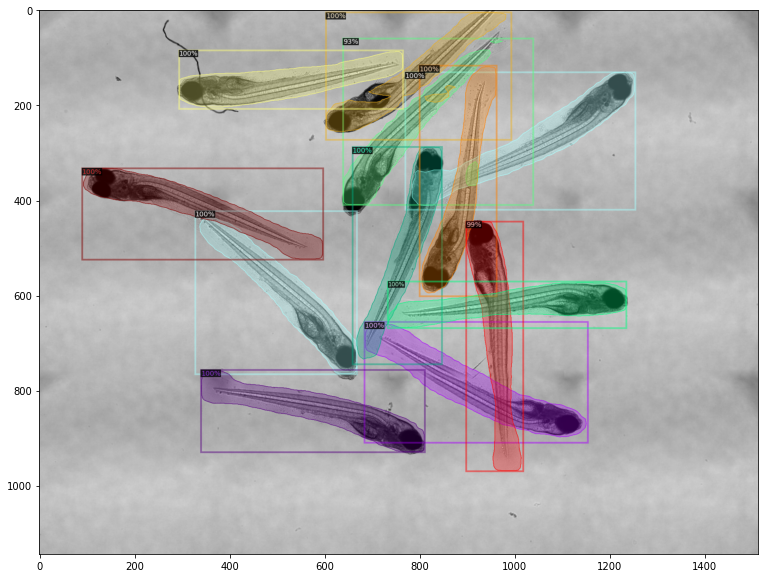

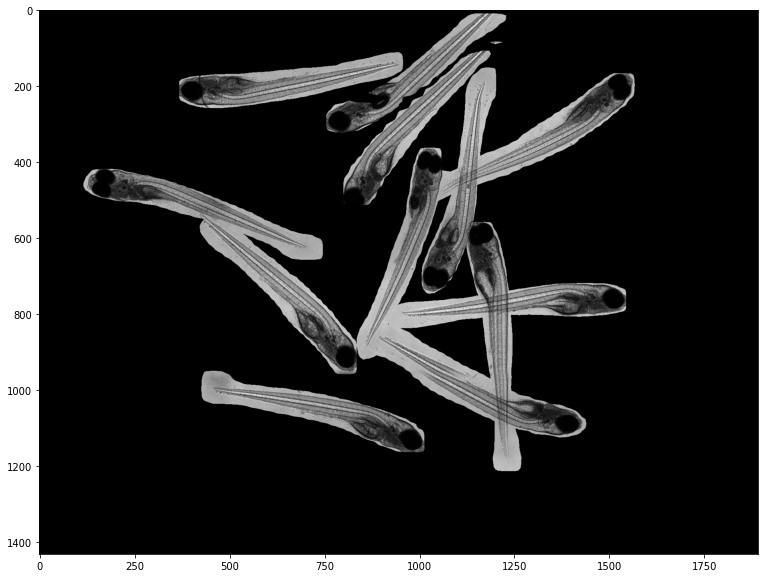

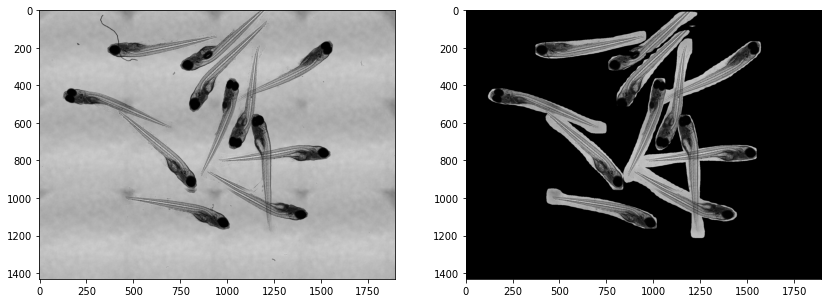

In [5]:
for image, prediction in zip(images, predictions):
    plot_prediction(image, prediction, cfg)
    plot_segementation(image, prediction)
    plot_segementation_vs_real(image, prediction)

## Learning curve

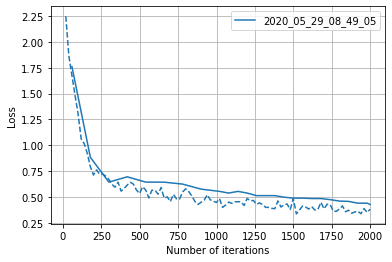

In [6]:
plot_train_vs_validation_loss([cfg.OUTPUT_DIR], show_training_loss=True)

## Compare to other models

In [7]:
bbox_df, segm_df = coco_evaluation_all_model("test")

[05/29 10:51:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/29 10:51:09 d2.evaluation.coco_evaluation]: Saving results to /home/jordi/Documents/Github/CS4245_cv_project_zebra_fish/output/2020_05_29_08_49_05/coco_instances_results.json
[05/29 10:51:09 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.04s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.836
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.970
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.970
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.921
 Average Precision  (AP) @[ IoU=0.50:0.95 | are

In [8]:
bbox_df

,model,used_direction,max_iteration,lrs,AP,AP50,AP75,APs,APm,APl
0,output/2020_05_29_08_49_05,False,2000,0.001,83.631830,97.029703,97.029703,NaN,92.079208,82.040561
1,output/2020_05_29_10_16_23,True,2000,0.001,79.705922,98.762376,98.762376,NaN,89.839109,78.551948


In [9]:
segm_df

,model,used_direction,max_iteration,lrs,AP,AP50,AP75,APs,APm,APl
0,output/2020_05_29_08_49_05,False,2000,0.001,75.643234,97.029703,93.399340,NaN,83.642150,73.754289
1,output/2020_05_29_10_16_23,True,2000,0.001,70.810536,98.762376,83.913641,NaN,81.019566,70.336344


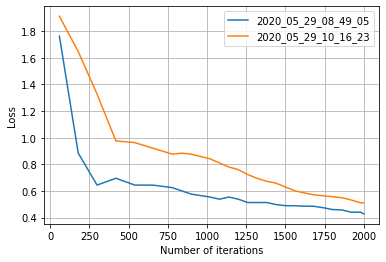

In [10]:
plot_all_model_validation_loss()